In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [3]:
print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


In [4]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

C:\Users\superman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\superman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from keras.layers import Dense, Input, concatenate
from keras.models import Model
x = Input(shape=(784,))
a=Dense(100, activation='relu')
a1=Dense(100, activation='relu')
a2=Dense(100, activation='relu')
a3=Dense(100, activation='relu')
b=Dense(200, activation='relu')
b1=Dense(200, activation='relu')
c=Dense(300, activation='relu')
c1=Dense(300, activation='relu')
c2=Dense(300, activation='relu')
d=Dense(400, activation='relu')
o=Dense(10, activation='softmax')

l1=a(x)
l2=b(x)
l3=c(x)
n3=d(x)
l4=a3(l3)
m1=a1(concatenate([l1,l2,l3,l4]))
p1=c1(m1)
p2=c2(p1)
y=o(concatenate([m1,n3,x,p1,p2]))

model = Model(x,y)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 300)          235500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          78500       input_1[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 200)          157000      input_1[0][0]                    
_____________________________________

In [7]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_mnis.png', show_shapes=True, show_layer_names=True)

![title](model_mnist.png)

In [8]:
model_his=model.fit(x_train, y_train, batch_size=100, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 13s 218us/step - loss: 8.4344 - acc: 0.4749
Epoch 2/20
60000/60000 [==============================] - 12s 193us/step - loss: 7.2248 - acc: 0.5510
Epoch 3/20
60000/60000 [==============================] - 11s 187us/step - loss: 7.1173 - acc: 0.5577
Epoch 4/20
60000/60000 [==============================] - 11s 184us/step - loss: 6.9304 - acc: 0.5697
Epoch 5/20
60000/60000 [==============================] - 11s 190us/step - loss: 7.0932 - acc: 0.5595
Epoch 6/20
60000/60000 [==============================] - 11s 186us/step - loss: 6.9260 - acc: 0.5700
Epoch 7/20
60000/60000 [==============================] - 11s 184us/step - loss: 6.3924 - acc: 0.6028
Epoch 8/20
60000/60000 [==============================] - 13s 224us/step - loss: 5.7418 - acc: 0.6434
Epoch 9/20
60000/60000 [==============================] - 12s 193us/step - loss: 5.5558 - acc: 0.6549
Epoch 10/20
60000/60000 [=========

In [9]:
score = model.evaluate(x_train, y_train, batch_size=10000)
print("Loss: %f" %score[0])
print("準確率: %f" %(score[1]*100))

60000/60000 [==============================] - 2s 41us/step
Loss: 5.248127
準確率: 67.426667


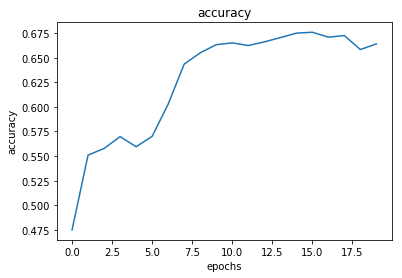

In [10]:
plt.plot(model_his.history['acc'])
plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()